375 1242
375 1242
375 1242
375 1242
375 1242
375 1242
tensor([[563.7102, 165.3760, 605.9131, 186.8800],
        [616.9662, 163.3280, 645.1015, 190.9760],
        [591.8454, 180.2240, 632.0386, 208.8960]])


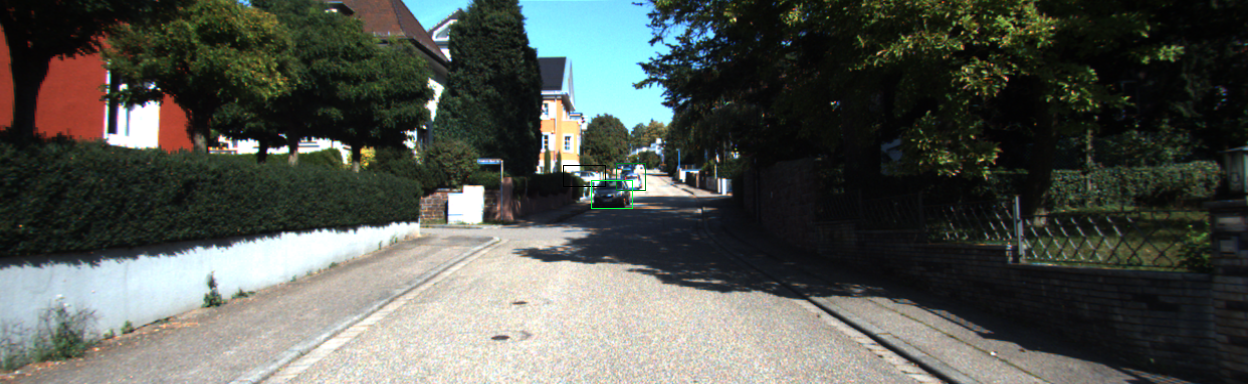

In [9]:
from model import YOLOv1
from loss import YoloLoss
from loss2 import YoloLoss as YoloLoss2
import torch
from data import KittiDetection2D
from utils import read_yaml
from torchvision.transforms import transforms
from torchvision.utils import draw_bounding_boxes
from utils import cellbox_to_corners
to_pil = transforms.ToPILImage()
from random import randint
def rect(img, target):
    img = (img*255).to(torch.uint8)
    boxes = cellbox_to_corners(target, (6,20), 9, target=True)
    boxes = boxes[torch.where(boxes[...,9]==1)]
    boxes = boxes[:,-4:]
    print(boxes)
    return to_pil(draw_bounding_boxes(img[0], boxes)/255)

img_transforms = transforms.Compose([ transforms.ToTensor()])

dataset = KittiDetection2D(r"E:\Deep Learning Projects\datasets\kitti_object_detection\Kitti\raw\training", transforms=img_transforms)

model_cfg = read_yaml('model.yaml')
model = YOLOv1(model_cfg)
idx = 473
img = dataset[idx][0].unsqueeze(0)
pil_img = to_pil(img.squeeze(0))
target = dataset[idx][1].unsqueeze(0)
# pred = model(img)
rect(img, target)

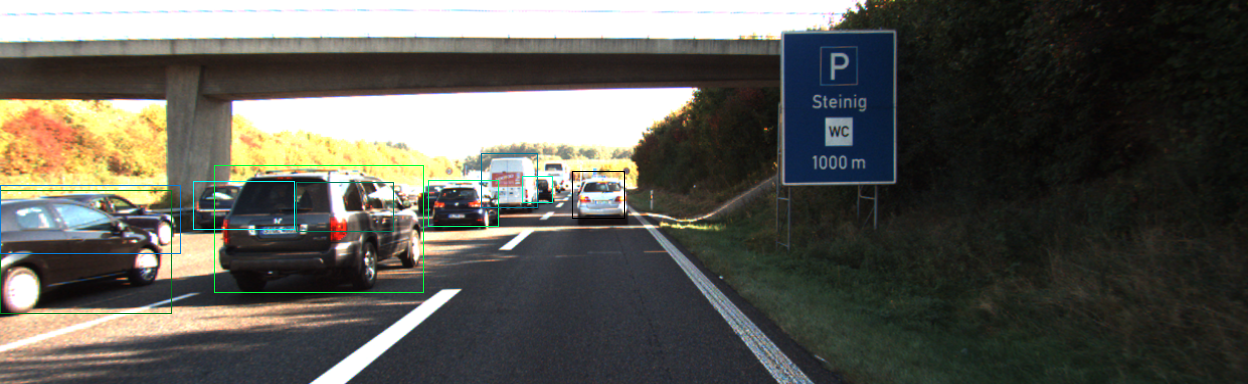

In [8]:
to_pil(draw_bounding_boxes((img[0]*255).to(torch.uint8), torch.tensor([589.61, 176.67, 629.93, 204.43])))

In [ ]:
loss1 = YoloLoss()
loss2 = YoloLoss2()



print(loss1(pred, target))
print('\n')
print(loss2(pred, target))

In [ ]:
x = torch.rand(1,2,2,4)
y = torch.rand(1,2,2,4)
mse = torch.nn.MSELoss(reduction='sum')
loss1 = mse(x[...,0:2],y[...,0:2]) + mse(x[...,2:4],y[...,2:4])
loss2 = mse(x[...,0:4],y[...,0:4])
print(loss1)
print(loss2)